Correlation coefficient between Y and Z: -0.0093


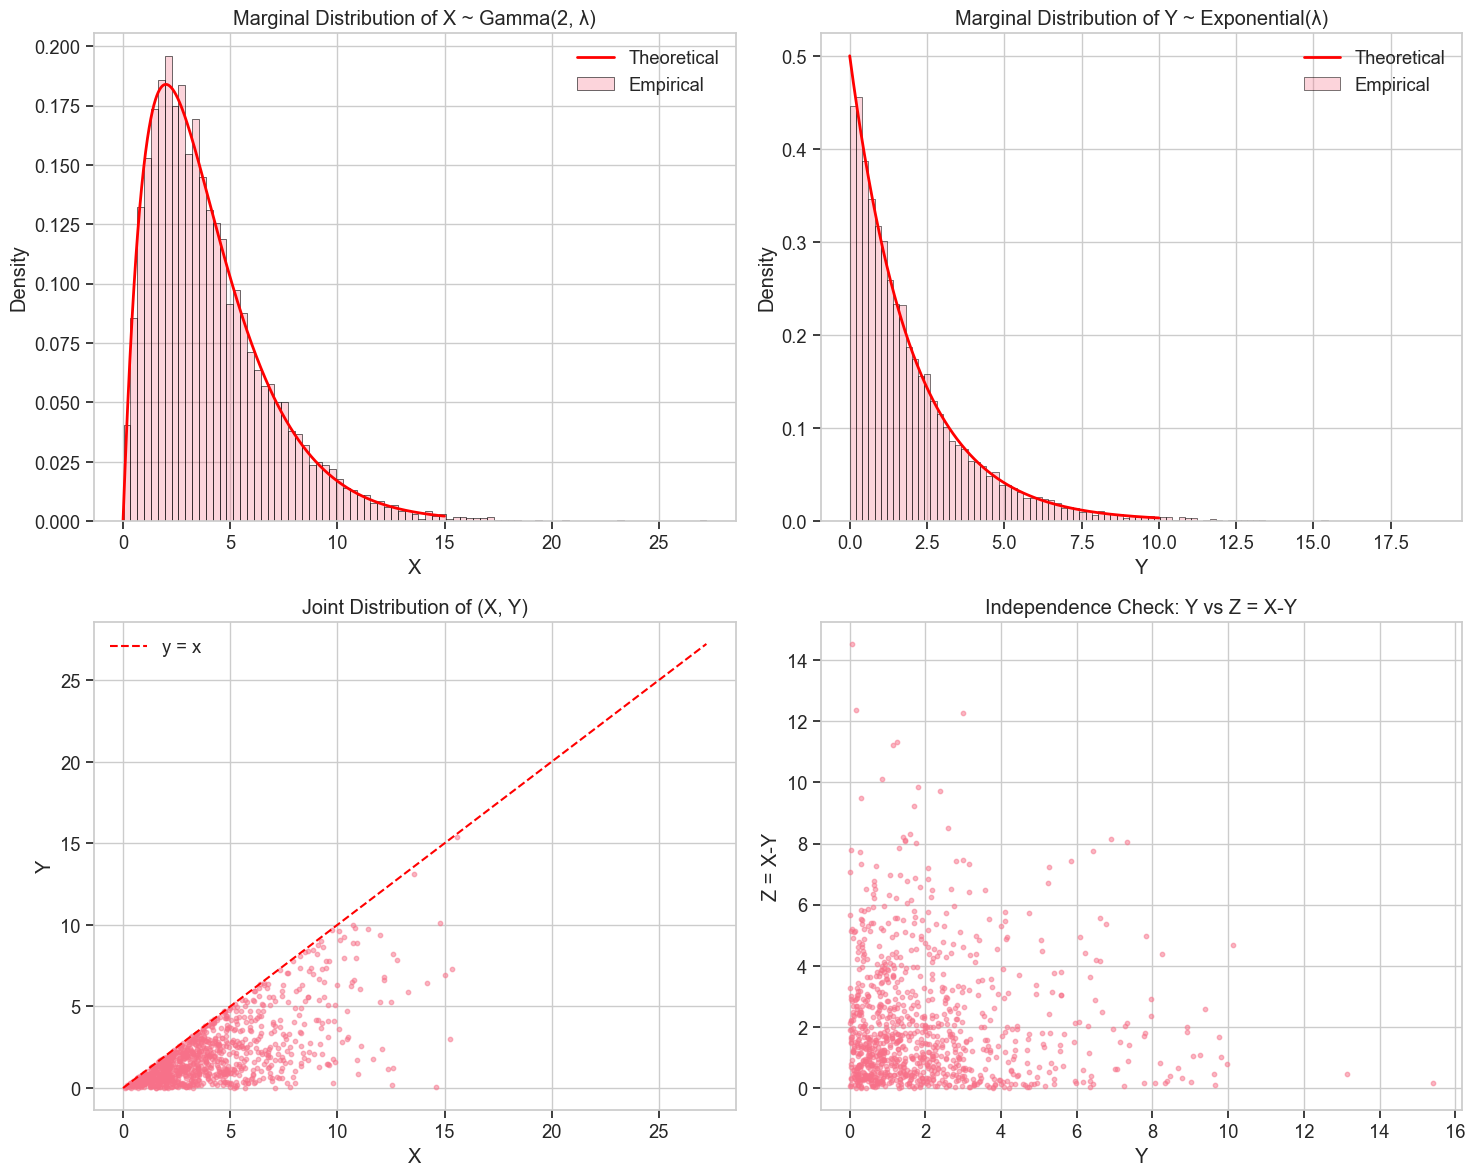

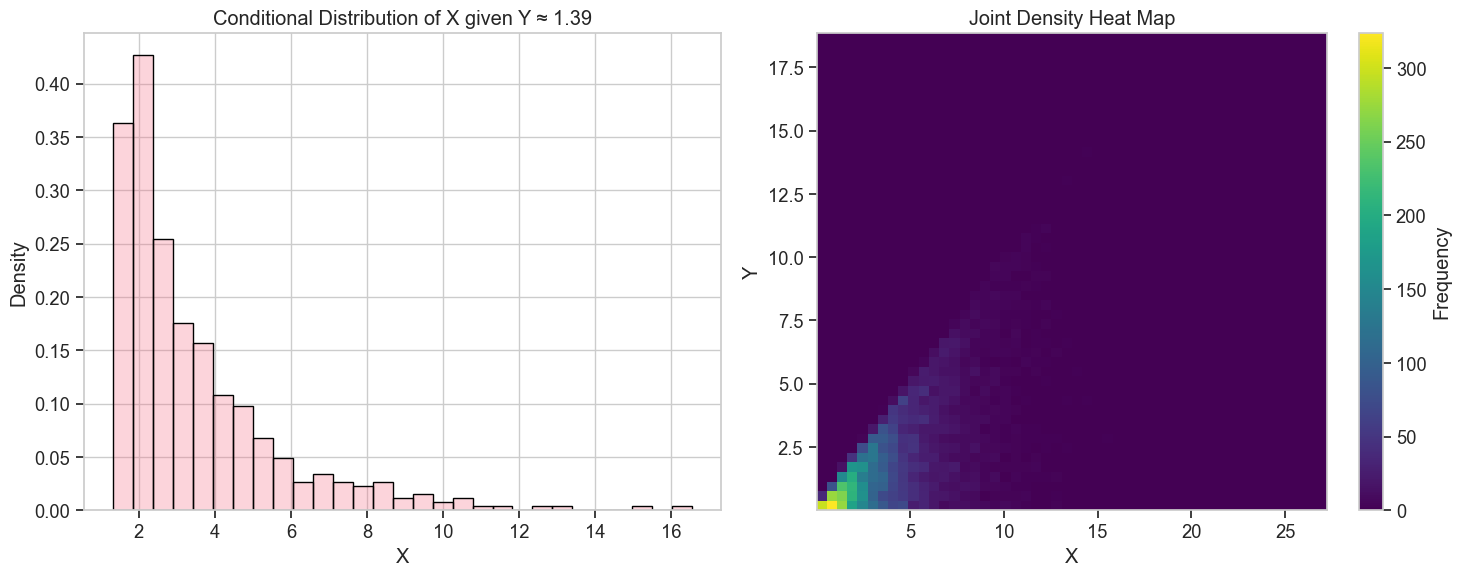

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma, uniform, expon

# Set random seed and styling
np.random.seed(42)

sns.set_palette("husl")

# Parameters
lambda_param = 0.5
n_samples = 10000

def generate_samples():
    # Generate X from Gamma(2, lambda)
    X = gamma.rvs(a=2, scale=1/lambda_param, size=n_samples)
    
    # Generate Y given X (Uniform(0, x) for each x)
    U = uniform.rvs(size=n_samples)
    Y = X * U
    
    # Calculate Z = X - Y
    Z = X - Y
    
    return X, Y, Z

def plot_distributions(X, Y, Z):
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(15, 12))
    
    # 1. Marginal distribution of X
    plt.subplot(2, 2, 1)
    x_range = np.linspace(0, 15, 1000)
    gamma_pdf = gamma.pdf(x_range, a=2, scale=1/lambda_param)
    
    sns.histplot(X, stat='density', alpha=0.3, label='Empirical')
    plt.plot(x_range, gamma_pdf, 'r-', lw=2, label='Theoretical')
    plt.title('Marginal Distribution of X ~ Gamma(2, λ)')
    plt.xlabel('X')
    plt.ylabel('Density')
    plt.legend()
    
    # 2. Marginal distribution of Y
    plt.subplot(2, 2, 2)
    y_range = np.linspace(0, 10, 1000)
    exp_pdf = lambda_param * np.exp(-lambda_param * y_range)
    
    sns.histplot(Y, stat='density', alpha=0.3, label='Empirical')
    plt.plot(y_range, exp_pdf, 'r-', lw=2, label='Theoretical')
    plt.title('Marginal Distribution of Y ~ Exponential(λ)')
    plt.xlabel('Y')
    plt.ylabel('Density')
    plt.legend()
    
    # 3. Joint distribution scatter plot
    plt.subplot(2, 2, 3)
    plt.scatter(X[:1000], Y[:1000], alpha=0.5, s=10)
    max_val = max(X.max(), Y.max())
    plt.plot([0, max_val], [0, max_val], 'r--', label='y = x')
    plt.title('Joint Distribution of (X, Y)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    
    # 4. Independence check: Y vs Z scatter plot
    plt.subplot(2, 2, 4)
    plt.scatter(Y[:1000], Z[:1000], alpha=0.5, s=10)
    plt.title('Independence Check: Y vs Z = X-Y')
    plt.xlabel('Y')
    plt.ylabel('Z = X-Y')
    
    plt.tight_layout()
    plt.show()

def plot_conditional_distributions(X, Y, Z):
    fig = plt.figure(figsize=(15, 6))
    
    # 1. Conditional distribution of X given Y
    plt.subplot(1, 2, 1)
    # Select a specific value of Y (e.g., around median)
    y_val = np.median(Y)
    y_window = 0.1
    
    mask = (Y >= y_val - y_window) & (Y <= y_val + y_window)
    x_given_y = X[mask]
    
    sns.histplot(x_given_y, stat='density', alpha=0.3)
    plt.title(f'Conditional Distribution of X given Y ≈ {y_val:.2f}')
    plt.xlabel('X')
    plt.ylabel('Density')
    
    # 2. Heat map of joint density
    plt.subplot(1, 2, 2)
    plt.hist2d(X, Y, bins=50, cmap='viridis')
    plt.colorbar(label='Frequency')
    plt.title('Joint Density Heat Map')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    plt.tight_layout()
    plt.show()

def main():
    # Generate samples
    X, Y, Z = generate_samples()
    
    # Calculate correlation between Y and Z
    correlation = np.corrcoef(Y, Z)[0,1]
    print(f"Correlation coefficient between Y and Z: {correlation:.4f}")
    
    # Plot distributions
    plot_distributions(X, Y, Z)
    plot_conditional_distributions(X, Y, Z)

if __name__ == "__main__":
    main()